# 📊 **Data Mining Preliminary Project**

**Group Members**
- Nathanael Chris Abrigo
- Dwight Kenneth Cruz
- Joshua Kyle Kessel Entrata
- Edjin Jerney Payumo

### Setup

#### **Install Dependencies**
*Uncomment the following line to install the required packages*  

#### **Importing Libraries**

In [1]:
### Importing Libraries

# Data manipulation and analysis
import pandas as pd
import numpy as np

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Setup for the notebook
pd.set_option('display.max_columns', None)
%matplotlib inline


#### Loading the Preprocessed Dataset

In [2]:
# Loading the 2023 FIES Dataset Volume 2
cleaned_fies = pd.read_csv('../data/processed/cleaned_fies.csv')


In [3]:
cleaned_fies.head(10)

,W_REGN,W_PROV,SEQ_NO,RPROV,FSIZE,REG_SAL,SEASON_SAL,WAGES,NETSHARE,CASH_ABROAD,CASH_DOMESTIC,RENTALS_REC,INTEREST,PENSION,DIVIDENDS,OTHER_SOURCE,NET_RECEIPT,REGFT,NET_CFG,NET_LPR,NET_FISH,NET_FOR,NET_RET,NET_MFG,NET_TRANS,NET_NEC_A8,NET_NEC_A9,NET_NEC_A10,EAINC,LOSSES,BREAD,MEAT,FISH,MILK,OIL,FRUIT,VEG,SUGAR,FOOD_NEC,FRUIT_VEG,COFFEE,TEA,COCOA,WATER,SOFTDRINKS,OTHER_NON_ALCOHOL,ALCOHOL,TOBACCO,OTHER_VEG,SERVICES_PRIMARY_GOODS,ALCOHOL_PROCDUCTION_SERVICES,FOOD_HOME,FOOD_OUTSIDE,FOOD,CLOTH,HOUSING_WATER,ACTRENT,IMPUTED_RENT,BIMPUTED_RENT,RENTVAL,FURNISHING,HEALTH,TRANSPORT,COMMUNICATION,RECREATION,EDUCATION,INSURANCE,MISCELLANEOUS,DURABLE,OCCASION,OTHER_EXPENDITURE,OTHER_DISBURSEMENT,FOOD_ACCOM_SRVC,NFOOD,TOINC,TOTEX,TOTDIS,OTHREC,TOREC,RPSU,RFACT,MEM_RFACT,URB,PERCAPITA,NPCINC,RPCINC,PRPCINC,PPCINC,RPCINC_NIR,W_REGN_NIR
0,1,28,1,2800,2.5,119000,0,119000,0,461000,10000,0,0,0,0,0,4760,310.0,0,0,0,0,0,0,0,0,0,0,0,0,18830.0,57120.0,46820.0,2540.0,1734.0,2410.0,8000.0,1835.0,2244.0,0.0,2250.0,0.0,0.0,1950.0,1820.0,0.0,0.0,0.0,0.0,0,0,147553.0,14000.0,161553.0,510,36840,0,12000,0,12000,5585,1410,7864,3060,0,0,0,8420,0,0,3700,0,0,67389.0,607070.0,228942.0,228942.0,0,607070.0,2,88.543663,229.392223,2,242828.000000,10,10,10,10,10,1
1,1,28,2,2800,6.0,154400,0,154400,0,142000,43000,6000,0,0,0,0,2790,1790.0,0,0,0,0,0,0,0,44000,0,0,44000,0,36323.0,50206.0,43405.0,12500.0,2340.0,4710.0,12115.0,1230.0,2930.0,702.0,5025.0,0.0,960.0,5850.0,6162.0,0.0,1950.0,0.0,0.0,0,0,184458.0,12800.0,197258.0,2010,32080,0,18000,0,18000,12850,1610,19850,18800,75,50,11880,33164,30700,0,800,600,0,165819.0,411980.0,363077.0,363677.0,0,411980.0,2,88.543663,550.541336,2,68663.335938,5,5,2,2,5,1
2,1,28,3,2800,3.5,683452,0,683452,0,37000,28000,9000,0,0,0,0,940,41820.0,0,0,0,0,0,0,0,0,0,0,0,0,27770.0,54160.0,36440.0,11955.0,2364.0,5360.0,13805.0,1470.0,2580.0,0.0,1860.0,0.0,0.0,3900.0,3120.0,0.0,0.0,0.0,0.0,0,0,164784.0,11500.0,176284.0,2440,52860,0,18000,0,18000,12810,2910,29620,12894,0,0,85909,14050,108000,1500,17200,42709,0,340193.0,818212.0,516477.0,559186.0,0,818212.0,2,88.543663,321.149113,2,233774.859375,10,10,10,10,10,1
3,1,28,4,2800,2.5,48200,0,48200,10000,55000,5000,9000,0,0,0,0,2360,24738.0,24240,0,0,0,62000,0,0,0,0,0,86240,0,18272.0,21220.0,20380.0,10490.0,1836.0,2780.0,8240.0,1060.0,1586.0,552.0,1910.0,0.0,0.0,2550.0,1820.0,0.0,0.0,0.0,0.0,0,0,92696.0,10000.0,102696.0,1950,40350,0,18000,0,18000,5418,5054,10560,7800,0,0,0,5690,0,0,920,0,0,77742.0,258538.0,180438.0,180438.0,0,258538.0,2,88.543663,229.392223,2,103415.203125,7,8,5,5,8,1
4,1,28,5,2800,3.0,400994,0,400994,0,108000,5000,0,0,0,0,0,220,850.0,17660,0,0,0,0,0,0,0,0,0,17660,0,27020.0,64250.0,45770.0,3320.0,1056.0,2020.0,7145.0,1150.0,2140.0,552.0,2130.0,0.0,0.0,3900.0,2730.0,0.0,0.0,0.0,0.0,0,0,163183.0,8000.0,171183.0,1700,62250,0,18000,0,18000,14920,2565,48960,25860,220,0,44760,13620,0,0,4400,46524,0,219255.0,550724.0,390438.0,436962.0,2000,552724.0,2,88.543663,275.270668,2,183574.671875,9,10,9,9,10,1
5,1,28,6,2800,4.0,0,0,0,0,180000,0,0,0,0,0,0,140,2530.0,0,0,0,0,80800,0,0,72000,0,0,152800,0,29402.0,45529.0,24450.0,9086.0,1870.0,2460.0,10265.0,3800.0,2687.0,552.0,2250.0,0.0,1886.0,4550.0,3640.0,0.0,0.0,0.0,0.0,0,0,142427.0,19800.0,162227.0,2090,65160,0,18000,0,18000,8886,4050,27730,13494,4250,500,6000,10630,2500,0,0,16200,0,145290.0,353470.0,307517.0,323717.0,0,353470.0,2,88.543663,367.027557,2,88367.500000,7,7,4,4,7,1
6,1,28,7,2800,3.5,0,0,0,0,181000,23000,9000,0,24000,0,0,280,40675.0,45600,0,0,0,0,0,0,0,0,0,45600,0,21707.0,37808.0,23000.0,16050.0,2394.0,3795.0,10635.0,2120.0,5247.0,0.0,1350.0,0.0,0.0,3250.0,3850.0,0.0,1124.0,0.0,0.0,0,0,131206.0,13800.0,145006.0,1550,44500,0,21000,0,21000,9416,32602,15760,7200,4000,0,0,9666,48000,0,0,0,0,173818.0,344555.0,318824.0,318824.0,3200,347755.0,2,88.543663,321.149113,2,98444.289063,7,7,5,5,7,1
7,1,28,8,2800,2.0,0,0,0,0,60000,14000,6000,0,0,0,0,800,3085.0,24850,0,0,0,0,0,106440,0,0,0,131290,0,18972.0,24270.0,26380.0,1416.0,942.0,1185.0,8105.0,1090.0,141

## **4️⃣ Data Quality Assessment**

### Data Wrangling


#### Feature Engineering

In [4]:
fies_feature = cleaned_fies.copy()

Classifying incomes into different social classes based on the defined thresholds

*References*
- https://pidswebs.pids.gov.ph/CDN/PUBLICATIONS/pidsdps2022.pdf
- https://psa.gov.ph/statistics/poverty

In [5]:
poverty_threshold = 13873 * 12  # Official poverty threshold (PSA, 2023)

def classify_income(row):
    total_income = row['TOINC']
    if total_income < poverty_threshold:
        return 'Poor'
    elif total_income < 2 * poverty_threshold:
        return 'Low income'
    elif total_income < 4 * poverty_threshold:
        return 'Lower-middle income'
    elif total_income < 7 * poverty_threshold:
        return 'Middle income'
    elif total_income < 12 * poverty_threshold:
        return 'Upper-middle income'
    elif total_income < 20 * poverty_threshold:
        return 'Upper income'
    else:
        return 'Rich'

fies_feature['SOCIAL_CLASS'] = fies_feature.apply(classify_income, axis=1)

In [6]:
print(fies_feature[['TOINC', 'SOCIAL_CLASS']].head(5))

      TOINC         SOCIAL_CLASS
0  607070.0  Lower-middle income
1  411980.0  Lower-middle income
2  818212.0        Middle income
3  258538.0           Low income
4  550724.0  Lower-middle income


In [7]:
fies_feature["SOCIAL_CLASS"].value_counts()

SOCIAL_CLASS
Low income             67700
Poor                   43265
Lower-middle income    37991
Middle income          10858
Upper-middle income     2715
Upper income             548
Rich                     191
Name: count, dtype: int64

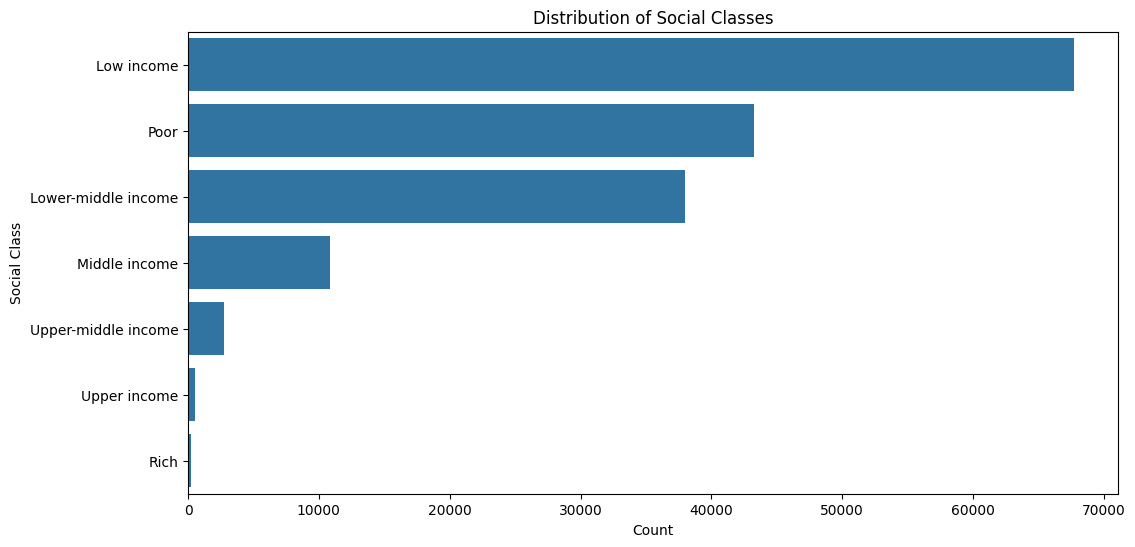

In [8]:
plt.figure(figsize=(12, 6))
sns.countplot(
    y="SOCIAL_CLASS",
    data=fies_feature,
    order=fies_feature["SOCIAL_CLASS"].value_counts().index,
)
plt.title("Distribution of Social Classes")
plt.xlabel("Count")
plt.ylabel("Social Class")
plt.show()


- To allow meaningful segmentation and comparative analysis of households, a new feature `SOCIAL_CLASS` was created by categorizing households based on their `TOINC` (Total Income). This allows for easier interpretation of income groups and supports targeted socioeconomic analysis.


In [9]:
fies_feature.shape

(163268, 91)

#### NCR Filtering

In [10]:
fies_ncr = fies_feature[cleaned_fies['W_REGN'] == 13]

In [11]:
# print how many rows remained after filtering
print("Number of rows in NCR: ", fies_ncr.shape[0])

Number of rows in NCR:  20690


> The dataset was filtered to include only households from the **NCR (National Capital Region)** to ensure a more focused analysis within a highly urbanized and economically distinct area. This allows the study to capture spending and income patterns specific to NCR’s urban households, where cost of living, income distribution, and consumption behaviors differ significantly from rural or other regional contexts.

#### Outliers Handling

- *To ensure meaningful groupings in distance-based analysis and association mining*, outliers in `TOINC` and `TOTEX` will be handled first to prevent skewed results.
- The **Interquartile Range (IQR) method** will be used, as it provides effective outlier handling and is suitable for real-world socioeconomic data without assuming normal distribution.

IQR (fe_totex): 203853.375
Lower Bound (fe_totex): -73435.3125
Upper Bound (fe_totex) 741978.1875
Number of rows before outlier handling for TOTEX: 20690
Number of rows after outlier handling for TOTEX: 19492


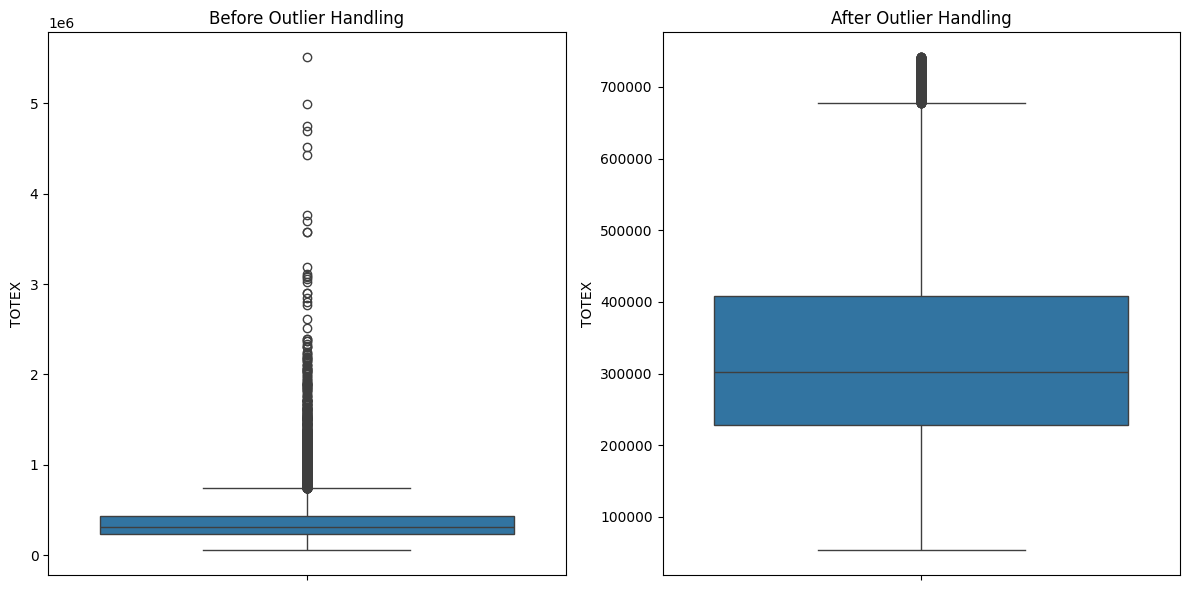

In [12]:
### Outliers in TOTEX (Total Expenditure)
fe_totex = fies_ncr['TOTEX']
Q1 = fe_totex.quantile(0.25)
Q3 =fe_totex.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(f'IQR (fe_totex): {IQR}')
print(f'Lower Bound (fe_totex): {lower_bound}')
print(f'Upper Bound (fe_totex) {upper_bound}')
outliers = (fies_ncr["TOTEX"] < lower_bound) \
    | (fies_ncr["TOTEX"] > upper_bound)

fe_totex_outlier_handled = fies_ncr[~outliers]

print(f'Number of rows before outlier handling for TOTEX: {len(fies_ncr)}')
print(f'Number of rows after outlier handling for TOTEX: {len(fe_totex_outlier_handled)}')
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.boxplot(data=fies_ncr.TOTEX, ax=axes[0])
axes[0].set_title("Before Outlier Handling")

sns.boxplot(data=fe_totex_outlier_handled.TOTEX, ax=axes[1])
axes[1].set_title("After Outlier Handling")

plt.tight_layout()
plt.show()


IQR (fe_toinc): 269893.5
Lower Bound (fe_toinc): -131035.0
Upper Bound (fe_toinc) 948539.0
Number of rows before outlier handling for TOINC: 19492
Number of rows after outlier handling for TOINC: 18848


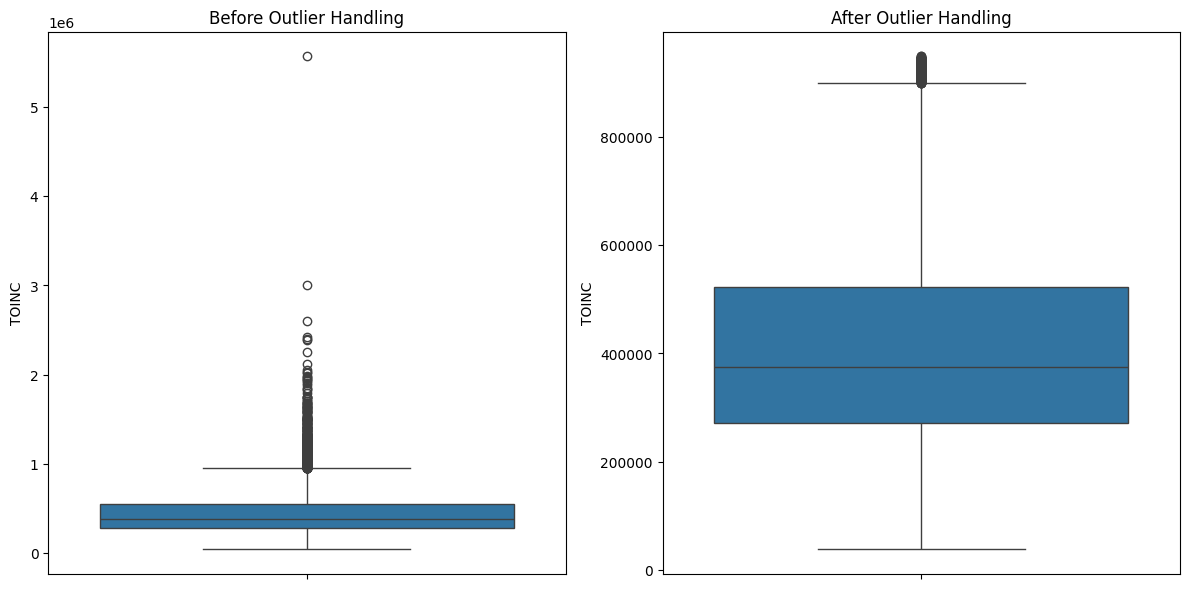

In [13]:
### Outliers in TOINC (Total Income)
fe_toinc = fe_totex_outlier_handled['TOINC']
Q1 = fe_toinc.quantile(0.25)
Q3 =fe_toinc.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(f'IQR (fe_toinc): {IQR}')
print(f'Lower Bound (fe_toinc): {lower_bound}')
print(f'Upper Bound (fe_toinc) {upper_bound}')
outliers = (fe_totex_outlier_handled["TOINC"] < lower_bound) \
    | (fe_totex_outlier_handled["TOINC"] > upper_bound)

fe_toinc_outlier_handled = fe_totex_outlier_handled[~outliers]

print(f'Number of rows before outlier handling for TOINC: {len(fe_totex_outlier_handled)}')
print(f'Number of rows after outlier handling for TOINC: {len(fe_toinc_outlier_handled)}')
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.boxplot(data=fe_totex_outlier_handled.TOINC, ax=axes[0])
axes[0].set_title("Before Outlier Handling")

sns.boxplot(data=fe_toinc_outlier_handled.TOINC, ax=axes[1])
axes[1].set_title("After Outlier Handling")

plt.tight_layout()
plt.show()


In [14]:
final_fies = fe_toinc_outlier_handled.copy()

In [15]:
final_fies.shape

(18848, 91)

In [16]:
final_fies["SOCIAL_CLASS"].value_counts()

SOCIAL_CLASS
Lower-middle income    9071
Low income             6992
Middle income          2144
Poor                    641
Name: count, dtype: int64

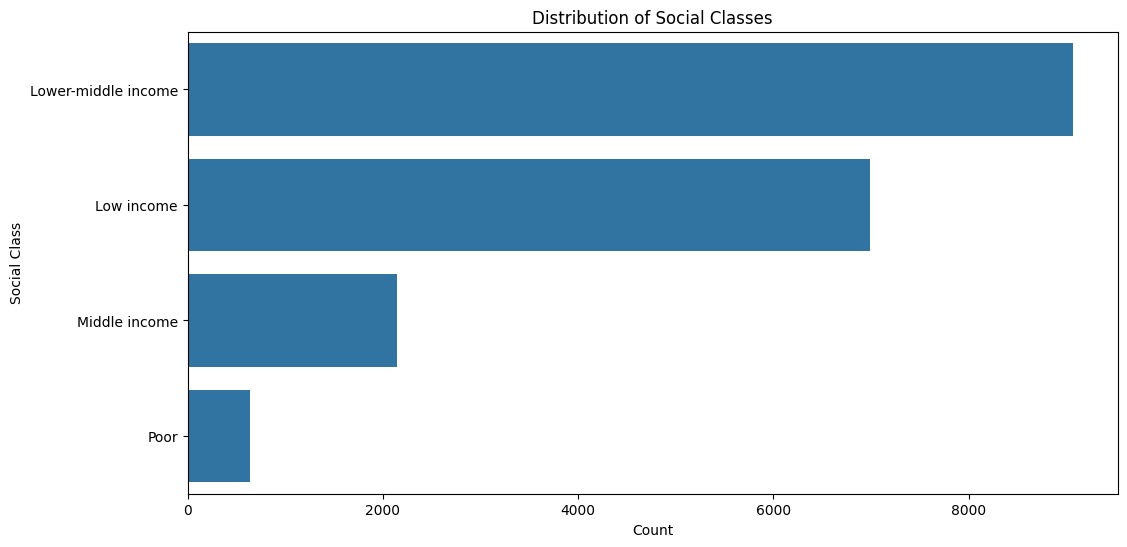

In [17]:
plt.figure(figsize=(12, 6))
sns.countplot(
    y="SOCIAL_CLASS",
    data=final_fies,
    order=final_fies["SOCIAL_CLASS"].value_counts().index,
)
plt.title("Distribution of Social Classes")
plt.xlabel("Count")
plt.ylabel("Social Class")
plt.show()


After filtering the dataset to include only NCR households and removing outliers based on Total Income (TOINC) and Total Expenses (TOTEX) using the IQR method, the resulting social class distribution remains imbalanced.

Notably, the 'Upper-middle' and 'Rich' social classes were excluded due to being classified as outliers. This suggests that households in these income brackets exhibit significantly higher income and expenditure patterns compared to the majority, making them statistical anomalies rather than representative of typical spending behavior in NCR.

## Export

In [18]:
final_fies.to_csv('../data/processed/final_fies.csv', index=False)